In [13]:
import pandas as pd
import pandas as np

# Load the dataset
file_path = "Day 49 Decision_Tree_Data.csv"
df = pd.read_csv(file_path)

# Display the first five rows of the dataset
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,-1.322458,1.748113,-1.351074,-1.445921,1.792659,-2.741316,0
1,0.054934,0.695617,-1.245717,0.073310,0.550877,-1.326263,1
2,1.857702,-0.839524,1.497432,1.324024,-1.018612,1.087993,1
3,-1.751829,-0.215598,-1.154363,2.777598,-0.872098,-0.605270,0
4,-0.009300,0.220160,0.000207,-0.677684,0.349892,-0.165382,0


In [4]:
# Compute summary statistics: mean, median, and variance for numerical features
summary_stats = df.describe().T  # Transpose for better readability

# Add median and variance manually as they are not included in describe()
summary_stats["median"] = df.median()
summary_stats["variance"] = df.var()

# Display the summary statistics
summary_stats


,count,mean,std,min,25%,50%,75%,max,median,variance
Feature_1,1000.0,-0.000416,1.003111,-2.991136,-0.710385,0.000185,0.665780,3.926238,0.000185,1.006232
Feature_2,1000.0,0.021475,0.818102,-2.787107,-0.517717,0.128403,0.539337,2.817960,0.128403,0.669291
Feature_3,1000.0,-0.012107,1.009586,-3.019512,-0.695964,0.003796,0.664881,3.243093,0.003796,1.019265
Feature_4,1000.0,-0.048433,1.322137,-3.836929,-1.021008,-0.224366,0.969732,3.994644,-0.224366,1.748047
Feature_5,1000.0,0.029704,0.858969,-3.281236,-0.456377,0.050139,0.544342,2.872178,0.050139,0.737828
Feature_6,1000.0,-0.022545,1.403956,-4.543441,-1.054538,-0.197133,0.990549,4.020262,-0.197133,1.971093
Target,1000.0,0.497000,0.500241,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250241


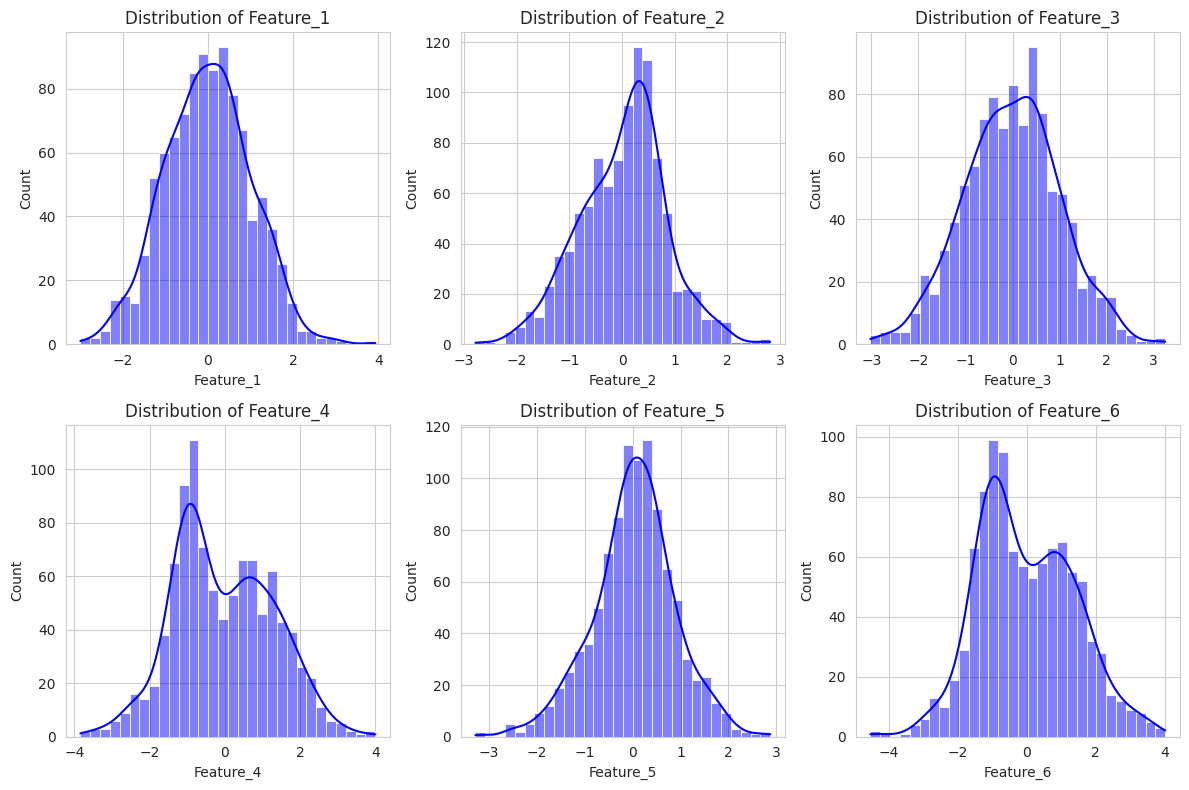

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# Plot the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude target variable
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


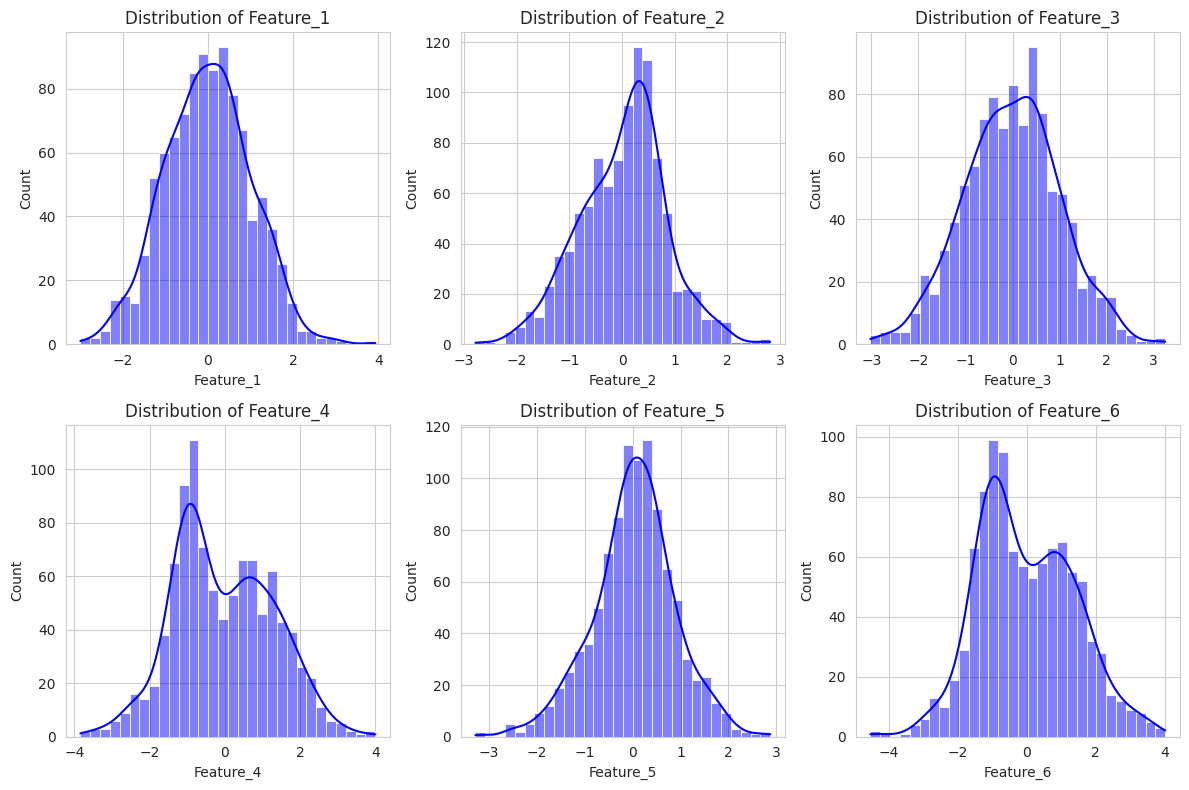

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# Plot the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude target variable
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values


,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Target,0


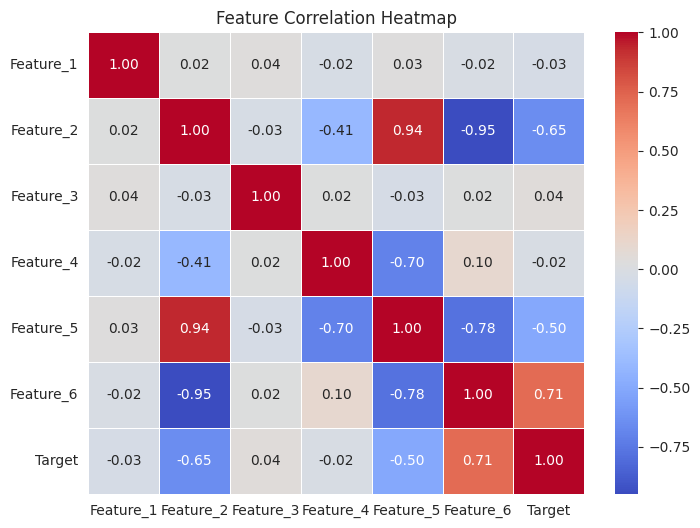

In [8]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
import numpy as np

# Compute correlation matrix
correlation_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Identify features with high correlation (threshold > 0.75)
high_correlation_pairs = [
    (column, index, correlation_matrix.loc[index, column])
    for column in upper_triangle.columns
    for index in upper_triangle.index
    if upper_triangle.loc[index, column] > 0.75
]

# Display highly correlated feature pairs
high_correlation_pairs


[('Feature_5', 'Feature_2', 0.9358816347153348),
 ('Feature_6', 'Feature_2', 0.9499655746670218),
 ('Feature_6', 'Feature_5', 0.7790082480201937)]